# 2. Linear Regression 

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
from sklearn.model_selection import KFold
import pydotplus
from sklearn import tree
from sklearn.metrics import r2_score
import seaborn as sns
import pickle as pkl
import math
import matplotlib.pyplot as plt
import time
import platform
import random
import os

## Q2. (a) 
#### Implement a Linear Regression model (from the scratch) taking suitable independent variables from the dataset. 

Report and Calculate the error obtained.

### Defining Hyperparameters

In [ ]:
CORRELATION_THRESHOLD = 0.2
epochs = 100
learning_rate = 0.1

### Loading Dataset

In [ ]:
df = pd.read_csv("/content/diamonds.csv")
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


### Label Encoding 
As all categorical coloumns have ordinal relationships, Label Encoding is preferable over One Hot Encoding

In [ ]:
labelencoder = LabelEncoder()
def label_encoding(df, cols):
    for c in cols:
        col = df[c]
        df = df.drop(c, 1)
        df[c] = labelencoder.fit_transform(col)
    return df

In [ ]:
cols = ['cut', 'color', 'clarity']
df = label_encoding(df, cols)
print("DATA AFTER LABEL ENCODING : \n")

#--------- SET INDEPENDANT VARIABLE PRICE---------#

price = df['price']
df = df.drop('price', 1)
df['price'] = price

#-------------------------------------------------#

df.head()

DATA AFTER LABEL ENCODING : 



,carat,depth,table,x,y,z,cut,color,clarity,price
0,0.23,61.5,55.0,3.95,3.98,2.43,2,1,3,326
1,0.21,59.8,61.0,3.89,3.84,2.31,3,1,2,326
2,0.23,56.9,65.0,4.05,4.07,2.31,1,1,4,327
3,0.29,62.4,58.0,4.20,4.23,2.63,3,5,5,334
4,0.31,63.3,58.0,4.34,4.35,2.75,1,6,3,335


### Feature Selection


## Q2. (b) 
#### What are the best suitable features you used to predict the price of the dataset and Why?

Idea: Use Correlation to get the suitable features and Report the values accordingly.

I used following features for training

*   carat
*   z
*   cut
*   color
*   clarity
*   table

I removed x, y because they are highly correlated with z. I removed depth as its correlation coefficient is very close to zero




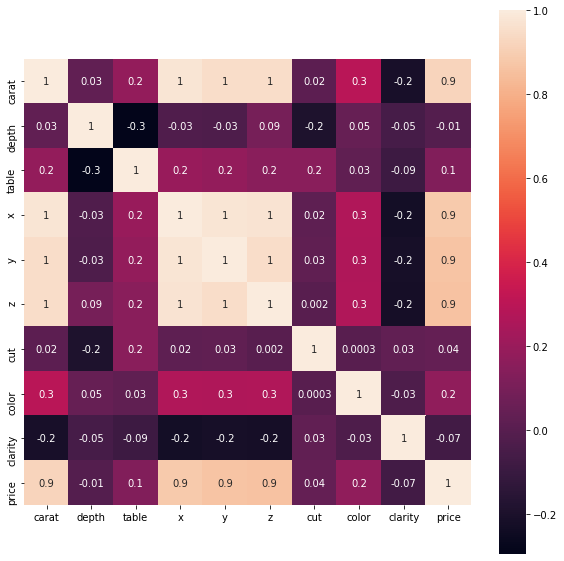

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
cor = df.corr() 
sns.heatmap(cor, annot = True, fmt='.1g', ax=ax, square=True)
cor = cor[:-1]

In [ ]:
cor_price = abs(cor["price"])
relevant_features = cor_price[cor_price>CORRELATION_THRESHOLD]
print(relevant_features)

carat    0.921591
x        0.884435
y        0.865421
z        0.861249
Name: price, dtype: float64


In [ ]:
# cols is a list of features which do not contribute much in Model training

def feature_selection(df, cols):
    for c in cols:
        df = df.drop(c,1)
    return df

rem_features = ['x','y','depth']
df = feature_selection(df, rem_features)
df.head()

,carat,table,z,cut,color,clarity,price
0,0.23,55.0,2.43,2,1,3,326
1,0.21,61.0,2.31,3,1,2,326
2,0.23,65.0,2.31,1,1,4,327
3,0.29,58.0,2.63,3,5,5,334
4,0.31,58.0,2.75,1,6,3,335


### Standardization

In [ ]:
def standardization(df, cols):
    for c in cols:
        df[c] = (df[c] - df[c].mean())/df[c].std()
    return df

std_cols = ['z','table','carat','color','clarity']
df1 = df    #-------> data without Normalization
df = standardization(df, std_cols)

In [ ]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1:]

x1 = df1.iloc[:, :-1]
y1 = df1.iloc[:, -1:]

In [ ]:
def concatenate_ones(x):
    ones = np.ones(shape = x.shape[0]).reshape(-1,1)
    return np.concatenate((ones, x), 1)
x = concatenate_ones(x)
x1 = concatenate_ones(x1)

In [ ]:
print(x.shape)
print(y.shape)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=55)
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.2, random_state=55)

(53940, 7)
(53940, 1)


### Model Creation and Training

In [ ]:
m = x_train.shape[0]        #-----------------> No. of training data
n = x_train.shape[1]        #-----------------> No. of features

def compute_cost(x, y, weights):
    predictions = x.dot(weights)
    errors = np.subtract(predictions, y)
    sqrErrors = np.square(errors)
    J = 1 / (2 * m) * np.sum(sqrErrors)
    return J

def gradient_descent(x, y, weights, learning_rate, epochs):
    cost_history = np.zeros(epochs)

    for i in range(epochs):
        predictions = x.dot(weights)
        errors = np.subtract(predictions, y)
        sum_delta = (learning_rate / m) * x.transpose().dot(errors);
        weights = weights - sum_delta;
        cost_history[i] = compute_cost(x, y, weights)  

    return weights, cost_history

weights = np.zeros(n).reshape(-1,1)

weights, cost_history = gradient_descent(x_train, y_train, weights, learning_rate, epochs)
#print('Final value of theta =', weights)

### Analyzing Loss Convergence 

Text(0, 0.5, 'cost (J)')

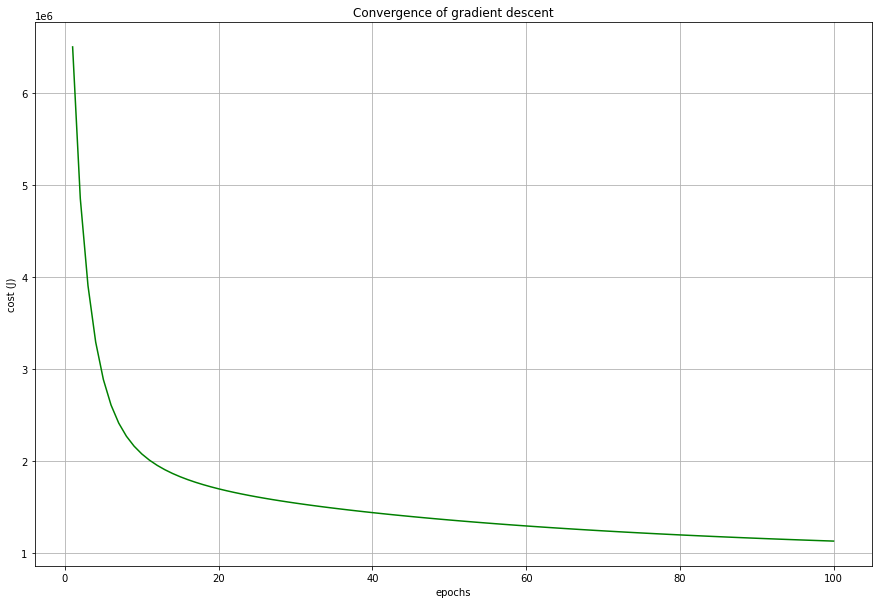

In [ ]:
plt.plot(range(1, epochs +1), cost_history, color ='green')
plt.rcParams["figure.figsize"] = (16,10)
plt.grid()
plt.title("Convergence of gradient descent")
plt.xlabel("epochs")
plt.ylabel("cost (J)")

### Prediction

In [ ]:
predicted_price = x_test.dot(weights)
y_pred_linear_reg = predicted_price
actual_price = y_test.to_numpy()
print("Predicted \t\t\t\t\t Actual")
print("-------------------------------------------------------")
for i in range(0, 5):
    print(str(predicted_price[i]) + " \t\t\t\t " + str(actual_price[i]))

Predicted 					 Actual
-------------------------------------------------------
[2446.78427941] 				 [1882]
[8143.94720626] 				 [9586]
[6160.19990257] 				 [5058]
[4431.4893266] 				 [2780]
[3826.87769464] 				 [2811]


### Calculating MSE, MAE, Rsquare Score

In [ ]:
def calculate_mse(predicted, actual):
    errors = np.subtract(predicted, actual)
    sqrErrors = np.square(errors)
    J = np.sum(sqrErrors)/(2 * len(sqrErrors)) 
    return J

def mean_absolute_error(predicted, actual):
    errors = np.subtract(predicted, actual)
    absErrors = np.absolute(errors)
    J = np.sum(absErrors)/(2 * len(absErrors)) 
    return J

def R_squared_score(predicted, actual):
    e1 = np.subtract(predicted, actual)
    sqr_e1 = np.sum(np.square(e1))

    e2 = np.subtract(actual,actual.mean())
    sqr_e2 = np.sum(np.square(e2))
    J = 1 - (sqr_e1/sqr_e2)
    return J

In [ ]:
print("\nMy model STATS")
print("--------------------------------------")
print()

mse = calculate_mse(predicted_price, actual_price)
print("MSE for Linear Regression : ", mse)

mae = mean_absolute_error(predicted_price, actual_price)
print("MAE for Linear Regression : ", mae)

rsqr_score = R_squared_score(predicted_price, actual_price)
print("R square score for Linear Regression : ", rsqr_score)


My model STATS
--------------------------------------

MSE for Linear Regression :  1128068.3190441711
MAE for Linear Regression :  523.0586169270146
R square score for Linear Regression :  0.8535751351372942


In [ ]:
reg = LinearRegression().fit(x_train, y_train)
ypredreg = reg.predict(x_test) 
mse1 = mean_squared_error(y_test,ypredreg) 
mae1 = mean_absolute_error(y_test, ypredreg)
r2score = r2_score(y_test, ypredreg)

print("\nScikit learn model STATS")
print("--------------------------------------")
print()

print("\nMean Squared Error : ", end = "")
print(mse1)

print("\nR2 score : ", end = "")
print(r2score)


Scikit learn model STATS
--------------------------------------


Mean Squared Error : 1909557.6348928155

R2 score : 0.8760683577774601


## Q2. (d) 
#### Now, using the whole dataset, predict the price of the Diamonds using the module of Linear Regression from sklearn. Report the changes you have observed compared to before? Adding extra features did it make the prediction better or worse. Comment?

##### My accuracy decreases as those features did not contribute in analysing the pattern in training process. Instead they increases the dimensions of data which deviates the model from tracing actual pattern. 

In [ ]:
weights1 = np.zeros(n).reshape(-1,1)

weights1, cost_history1 = gradient_descent(x1_train, y1_train, weights1, learning_rate, epochs)

predicted_price1 = x1_test.dot(weights1)
actual_price1 = y1_test.to_numpy()

print("\nMy model STATS (for data without Standardization)")
print("-------------------------------------------------")
print()

mse = calculate_mse(predicted_price1, actual_price1)
print("MSE for Linear Regression : ", mse)

mae = mean_absolute_error(predicted_price1, actual_price1)
print("MAE for Linear Regression : ", mae)

rsqr_score = R_squared_score(predicted_price1, actual_price1)
print("R square score for Linear Regression : ", rsqr_score)



My model STATS (for data without Standardization)
-------------------------------------------------

MSE for Linear Regression :  1128068.3190441711
MAE for Linear Regression :  523.0586169270146
R square score for Linear Regression :  0.8535751351372942


In [ ]:
reg = LinearRegression().fit(x1_train, y1_train)
ypredreg = reg.predict(x1_test) 
mse1 = mean_squared_error(y1_test,ypredreg) 
mae1 = mean_absolute_error(y1_test, ypredreg)
r2score = r2_score(y1_test, ypredreg)

print("\nScikit learn model STATS (for data without Standardization)")
print("--------------------------------------")
print()

print("\nMean Squared Error : ", end = "")
print(mse1)

print("\nR2 score : ", end = "")
print(r2score)


Scikit learn model STATS (for data without Standardization)
--------------------------------------


Mean Squared Error : 1909557.6348928155

R2 score : 0.8760683577774601


## Q2. (e) 
#### Now, compare the algorithms KNN regression and Linear Regression. What are the differences you have observed? Which is better and why. Your statements should be backed up with statistics.

In [ ]:
print("-> \t\t\t        MSE \t\t\t        MAE")
print("---------------------------------------------------------------------------")
print()
print("KNN Regression" + " \t\t\t " + str(MSE_E) + " \t\t\t " + str(MAE_E))
print()
print("Linear Regression" + " \t\t\t " + str(mse) + " \t\t\t " + str(mae))

-> 			        MSE 			        MAE
---------------------------------------------------------------------------

KNN Regression 			 261839.20396663575 			 182.72048192771084

Linear Regression 			 1128068.3190441711 			 523.0586169270146


As we can clearly see from above table that, for this data, KNN algorithm performs better then Linear Regression.

Reason : Lack of linear similarities between the, linear regression fails to accurately trace the data pattern. KNN supports non-linear solutions where LR supports only linear solutions. 

## Q2. (f) 
#### Plot the predicted values from KNN regression, Linear Regression and Actual 


No handles with labels found to put in legend.


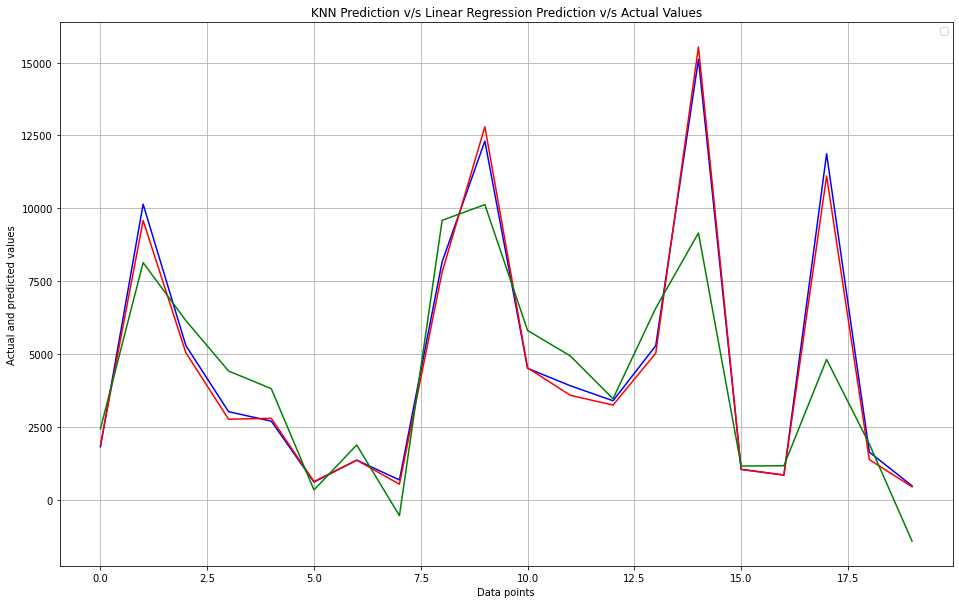

In [ ]:
knn20 = predicted_M[0][:20]
actual20 = actual_price[:20]
linear20 = predicted_price[:20]

plt.plot(range(20), knn20, color ='blue')
plt.plot(range(20), actual20, color ='red')
plt.plot(range(20), linear20, color ='green')

plt.rcParams["figure.figsize"] = (15,10)
plt.grid()
plt.title("KNN Prediction v/s Linear Regression Prediction v/s Actual Values")
plt.xlabel("Data points")
plt.ylabel("Actual and predicted values")
plt.legend()



---


